In [1]:
import numpy as np
import pandas as pd

In [2]:
refmat = np.load('clu_0_2dpi_peaks_mat.npy', allow_pickle = True)

In [3]:
refmat = np.asarray(refmat.all().todense())

In [4]:
peaksnames = pd.read_csv('clu_0_2dpi_peaksnames.csv', index_col = 0)

In [5]:
peaksnames.rename(columns = {'rownames(peaks_mat)': 'names'}, inplace = True)

In [6]:
#meta = pd.read_csv('clu_0_2_dpi_new_meta.csv', index_col = 0)
meta = pd.read_csv('clu_0_2_dpi_dblt_filtd_meta_rezonationed_redone2.csv', index_col = 0)

In [7]:
revsc_sigpeaks = pd.read_csv('revsc_signature_peaks_all50_withupper.csv', index_col = 0)
revsc_peaks = pd.read_csv('top_revsc_markers_markers.csv', index_col = 0)
a13_peaks = pd.read_csv('top_a13_markers_clu_0_2_dpi.csv', index_col = 0)

In [8]:
poi = np.hstack([np.where(peaksnames['names'] == x)[0] for x in revsc_sigpeaks.y])

In [9]:
import seaborn as sns; sns.set_theme(color_codes=True)
import matplotlib.colors as clr
import matplotlib.pyplot as plt

In [10]:
meta['new_collapse_idents'].unique()

array(['Immune', 'Villus_Middle', 'RevSC1-W16', 'Villus_Top',
       'Anoikis_Like', 'Paneth Cells', 'Goblet Cells',
       'Enteroendocrine Cells', 'Fibroblasts', 'Tuft Cells',
       'Intestinal Crypt Cells', 'Villus_Bottom', 'CVJ'], dtype=object)

In [11]:
meta2 = meta.iloc[np.where((meta['new_collapse_idents2'] != 'Tuft Cells'))[0],]
refmat2 = refmat[:,np.where( &( meta['new_collapse_idents2'] != 'Tuft Cells'))[0]]

In [14]:
refmat2.shape

(114602, 13805)

In [15]:
revsc_peaks

,top_revsc_markers_markers
1,12-76505607-76506247
2,2-102636030-102636967
3,1-169406976-169407462
4,7-144524706-144525822
5,13-29686667-29687243
...,...
2804,18-55039671-55040360
2805,5-114268320-114269915
2806,13-31370528-31371501
2807,11-3348308-3348759


In [16]:
meta.columns

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrub', 'gex_barcode',
       'atac_barcode', 'is_cell', 'excluded_reason', 'gex_raw_reads',
       'gex_mapped_reads',
       ...
       'cvj', 'villus_bottom', 'villus_mid', 'villus_top', 'collapse_idents',
       'zonation2', 'new_wnn_clusters', 'new_peaks_clusters_idents',
       'new_rna_clusters', 'new_collapse_idents'],
      dtype='object', length=131)

In [17]:
cluster_peaksscore = pd.DataFrame(index = meta['new_peaks_clusters_idents'].unique(), columns = a13_peaks.top_a13_markers)

In [18]:
for cluster in cluster_peaksscore.index:
    for peak in cluster_peaksscore.columns:
        cluster_peaksscore.loc[cluster, peak] = np.mean(refmat[np.where(peaksnames['names']  == peak)[0],:][:,np.where(meta['new_peaks_clusters_idents'] == cluster)[0]][0])

In [19]:
cluster_peaksscore

top_a13_markers,12-76505607-76506247,2-102636030-102636967,1-169406976-169407462,7-144524706-144525822,1-187642670-187643284,17-24462669-24463661,9-14587115-14588048,X-11394750-11395179,17-48164612-48164997,18-25417918-25418416,...,10-42815981-42817062,12-103291463-103292086,3-37693637-37695233,18-84745408-84746055,3-129341405-129341846,8-39472712-39473621,8-107311563-107312194,17-71395830-71396570,11-103253899-103254635,4-125051824-125052198
A1,0.021541,0.018339,0.006253,0.014457,0.014674,0.028699,0.032151,0.010771,0.007844,0.00982,...,0.048899,0.47642,0.309829,0.06027,0.030392,0.377978,0.048065,0.134024,0.194994,0.031068
A2,0.003791,0.014305,0.013347,0.024187,0.018658,0.011785,0.022986,0.0,0.003774,0.0,...,0.069545,0.049767,0.076472,0.041293,0.040642,0.038397,0.0323,0.028539,0.034324,0.053213
A4,0.029196,0.030369,0.0,0.051753,0.034585,0.029572,0.025448,0.026213,0.014988,0.016335,...,0.207721,0.084758,0.206889,0.17509,0.148869,0.123963,0.293605,0.157084,0.060431,0.219841
A3,0.027399,0.046811,0.016196,0.074625,0.034437,0.036043,0.03091,0.022496,0.01725,0.014492,...,0.43396,0.085344,0.395433,0.248196,0.150821,0.15928,0.340058,0.199982,0.064218,0.204133
A9,0.0,0.063746,0.0,0.049201,0.037039,0.041563,0.059075,0.025721,0.030132,0.047066,...,0.180871,0.079758,0.27184,0.253491,0.190892,0.148465,0.254605,0.223656,0.068214,0.10168
A13,1.150947,1.025263,0.768971,1.031054,0.877635,0.834035,0.923513,0.637762,0.792072,0.673276,...,0.569071,0.419949,0.69373,0.442876,0.405113,0.502582,0.583067,0.506435,0.417562,0.403886
A12,0.063972,0.01764,0.025237,0.095266,0.073119,0.113937,0.09256,0.065175,0.143511,0.038642,...,0.40878,0.227658,0.52427,0.294817,0.222523,0.320976,0.54841,0.493755,0.241555,0.433011
A6,0.015877,0.016633,0.0,0.016374,0.051043,0.024992,0.011437,0.0,0.036278,0.006501,...,0.122993,0.040541,0.144117,0.18748,0.081633,0.079771,0.223674,0.273771,0.047241,0.100143
A7,0.027399,0.013149,0.007708,0.027576,0.009279,0.032952,0.026158,0.016313,0.0,0.008815,...,0.041676,0.428604,0.265573,0.057998,0.0,0.312842,0.046518,0.080791,0.095016,0.015272
A11,0.040255,0.061605,0.025853,0.108716,0.174506,0.068559,0.071815,0.0,0.208559,0.02339,...,0.339175,0.212008,0.56337,0.316267,0.173778,0.250058,0.339136,0.506262,0.25285,0.369433


In [21]:
cluster_peaksscore

top_revsc_markers_markers,12-76505607-76506247,2-102636030-102636967,1-169406976-169407462,7-144524706-144525822,13-29686667-29687243,17-24462669-24463661,15-81837984-81838675,16-44944731-44945465,1-187642670-187643284,7-66230321-66230987,...,17-46632964-46633731,8-34476897-34477540,17-5345748-5346382,4-6364930-6366159,15-67654151-67654773,18-55039671-55040360,5-114268320-114269915,13-31370528-31371501,11-3348308-3348759,12-59152457-59153439
Immune,0.018263,0.018311,0.008976,0.029882,0.009528,0.023843,0.017506,0.021201,0.015846,0.012003,...,0.019726,0.01771,0.090054,0.37545,0.029815,0.072475,0.537979,0.044392,0.02719,0.048771
Enterocytes,0.02323,0.02819,0.010361,0.068216,0.043881,0.040631,0.056282,0.028717,0.039682,0.058249,...,0.224645,0.162864,0.158889,0.329317,0.189836,0.280556,0.391441,0.237251,0.172384,0.319578
RevSC1,0.974887,0.936946,0.650603,0.903087,0.752832,0.726851,0.803752,0.689346,0.728498,0.761648,...,0.405755,0.375288,0.426874,0.67126,0.377981,0.509006,0.7461,0.533968,0.43325,0.493162
Paneth Cells,0.340711,0.584445,0.0,0.264447,0.080043,0.044348,0.344615,0.150059,0.057497,0.268429,...,0.249012,0.283593,0.348773,0.689,0.393133,0.472572,0.865112,0.533859,0.503626,0.17294
Goblet Cells,0.059949,0.065064,0.012452,0.100528,0.071188,0.022706,0.108045,0.05131,0.050821,0.104814,...,0.165445,0.244764,0.294639,0.633245,0.227165,0.323655,0.487623,0.480445,0.339758,0.186402
Enteroendocrine Cells,0.109058,0.0,0.0,0.057526,0.03655,0.066664,0.28675,0.015553,0.029522,0.035802,...,0.189111,0.18495,0.379849,0.449563,0.3917,0.106406,0.505338,0.279621,0.208376,0.076767
Fibroblasts,0.0,0.0,0.0,0.358693,0.360188,0.0,0.0,0.520578,0.09442,0.0,...,0.055511,0.060826,0.283679,0.227871,0.0,0.0,0.273173,0.0,0.0,0.044948
Crypt Cells,0.062315,0.220787,0.0228,0.287764,0.065993,0.053903,0.092714,0.02751,0.021693,0.124956,...,0.355694,0.260421,0.342659,0.37171,0.16331,0.387762,0.626712,0.358993,0.468787,0.28826


In [14]:
revsc_sigpeaks.x.str.split('_', expand = True)[1]

Ly6d_upper_bound.1    upper
Ly6d_upper_bound.2    upper
Clu.1                  None
Clu.2                  None
Cldn4                  None
                      ...  
Cxadr.9                None
Cxadr.10               None
Cxadr.11               None
Cxadr.12               None
Cxadr_upper_bound     upper
Name: 1, Length: 137, dtype: object

In [15]:
revsc_sigpeaks['gene'] = revsc_sigpeaks.x.str.split('_', expand = True)[0]
revsc_sigpeaks['upper/none'] = revsc_sigpeaks.x.str.split('_', expand = True)[1]

In [16]:
ecs = ['EC-W8','EC-W17',  'EC-W4', 'EC-W2','EC-W3',  'EC-W9', 'EC-W6','EC-W14',  'EC-W18', 'EC-W20','EC-W5', 'EC-W1']
ecs.reverse()

In [17]:
clusters = []
#clusters.append(cluster_counts.columns[cluster_counts.columns.str.startswith('Immune')])
#clusters.append(cluster_counts.columns[cluster_counts.columns.str.startswith('Fibro')])

#clusters.append(cluster_counts.columns[cluster_counts.columns.str.startswith('EC')])
clusters.append(cluster_peaksscore.index[cluster_peaksscore.index.str.startswith('GC')])
clusters.append(cluster_peaksscore.index[cluster_peaksscore.index.str.startswith('EE')])
clusters.append(cluster_peaksscore.index[cluster_peaksscore.index.str.startswith('TC')])
clusters.append(cluster_peaksscore.index[cluster_peaksscore.index.str.startswith('PC')])
clusters.append(np.hstack([cluster_peaksscore.index[cluster_peaksscore.index == clus] for clus in ecs]))
clusters.append(cluster_peaksscore.index[cluster_peaksscore.index.str.startswith('CC')])
clusters.append(cluster_peaksscore.index[cluster_peaksscore.index.str.startswith('RevSC')])

In [16]:
cluster_peaksscore = cluster_peaksscore.loc[list(np.hstack(clusters)),]

NameError: name 'clusters' is not defined

In [17]:
cluster_peaksscore

y,15-74624482-74625006,15-74632587-74632852,14-66205719-66206231,14-66215353-66215699,5-134975601-134976114,5-134964408-134964992,5-134970644-134971006,3-92393066-92393483,5-91286931-91287664,5-91282837-91283165,...,2-35157002-35158171,2-35159176-35159379,2-35160731-35160968,2-35161829-35162094,2-35172104-35172675,2-35178915-35179355,2-35187909-35188235,2-35189336-35189709,2-35190106-35190346,2-35194395-35195820
Immune,0.15645,0.058843,0.041751,0.017499,0.032939,0.033664,0.0152,0.011384,0.065083,0.012621,...,0.059425,0.014164,0.07987,0.019553,0.078132,0.093454,0.102394,0.053198,0.082152,0.070976
Villus_Middle,0.107687,0.09325,0.185811,0.099437,0.10471,0.101719,0.010817,0.061156,0.261224,0.158192,...,0.369433,0.112497,0.081432,0.087926,0.132657,0.115483,0.08678,0.098607,0.009454,0.419883
RevSC1-W16,0.261799,0.283255,0.62455,0.077707,0.647722,0.320391,0.02502,0.467853,0.387665,0.069466,...,0.709103,0.35203,0.244999,0.412087,0.418693,0.272092,0.143772,0.126615,0.0,0.415639
Villus_Top,0.145705,0.059911,0.204089,0.094818,0.302566,0.299116,0.049558,0.139975,0.290861,0.113393,...,0.441075,0.162936,0.108085,0.104171,0.158775,0.103728,0.079993,0.060113,0.009485,0.489005
Anoikis_Like,0.035934,0.010143,0.059054,0.017318,0.092682,0.140401,0.021725,0.024482,0.106638,0.038899,...,0.114223,0.039043,0.015127,0.00817,0.024047,0.032373,0.035569,0.043452,0.003502,0.193749
Paneth Cells,0.259078,0.171509,0.28123,0.02101,0.503256,0.537543,0.469586,0.273187,0.474886,0.06262,...,0.621959,0.155121,0.171348,0.159772,0.268708,0.269586,0.135803,0.149586,0.065326,0.361545
Goblet Cells,0.181308,0.100986,0.189772,0.025754,0.464636,0.666592,0.23763,0.137248,0.296961,0.033923,...,0.597652,0.094541,0.134163,0.183658,0.238807,0.146447,0.073309,0.074041,0.01526,0.273591
Enteroendocrine Cells,0.186371,0.096544,0.219287,0.037116,0.290209,0.133929,0.346574,0.014495,0.248266,0.033184,...,0.287287,0.015764,0.082896,0.048938,0.121473,0.118637,0.109711,0.0,0.043432,0.106507
Fibroblasts,0.204244,0.0,0.398603,0.0,0.057786,0.080223,0.0,0.0,0.221027,0.0,...,0.144135,0.116444,0.0,0.0,0.378222,0.075069,0.0,0.12415,0.0,0.139306
Tuft Cells,0.12675,0.169445,0.109309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.114587,0.0,0.0,0.0,0.0,0.0,0.0,0.156677,0.0,0.0


In [17]:
import colorsys

In [18]:
colormap = {}
colors = []
genes = []
for i in range(len(revsc_sigpeaks.gene.unique())):
    color = [np.random.randint(255),np.random.randint(255),np.random.randint(255)]
    for peak in revsc_sigpeaks.loc[revsc_sigpeaks['gene'] == revsc_sigpeaks.gene.unique()[i],'y'][revsc_sigpeaks.loc[revsc_sigpeaks['gene'] ==revsc_sigpeaks.gene.unique()[i],'upper/none'] != 'upper']:
        colormap[peak] =np.array(color) / 255
    if revsc_sigpeaks.gene.unique()[i] in revsc_sigpeaks.x.unique():
        
        colors.append(color)
        genes.append(revsc_sigpeaks.gene.unique()[i]) 
    if 'upper' in revsc_sigpeaks.loc[revsc_sigpeaks['gene'] == revsc_sigpeaks.gene.unique()[i],'upper/none'].unique():
        h, l, s = colorsys.rgb_to_hls(*(np.array(color) / 255))
        color2 = np.array(colorsys.hls_to_rgb(h, min(1, l * 0.5), s = s))
        color2= [int(x) for x in color2*255]
        for peak in revsc_sigpeaks.loc[revsc_sigpeaks['gene'] == revsc_sigpeaks.gene.unique()[i],'y'][revsc_sigpeaks.loc[revsc_sigpeaks['gene'] ==revsc_sigpeaks.gene.unique()[i],'upper/none'] == 'upper']:
            colormap[peak] =np.array(color2) / 255
        colors.append(color2)
        genes.append(revsc_sigpeaks.gene.unique()[i]+"_upper_bound") 

AttributeError: 'DataFrame' object has no attribute 'gene'

In [22]:
import drawSvg as draw

In [23]:
len(genes)

40

In [24]:
45/9

5.0

In [25]:
split1 = 5
split2 = 9

0
Ly6d_upper_bound
1
Clu
2
Cldn4
3
Cldn4_upper_bound
4
Sprr1a
5
Areg
6
Areg_upper_bound
7
Gsta1_upper_bound
8
Tm4sf4
9
Tm4sf4_upper_bound
10
Lypd8
11
Lypd8_upper_bound
12
Ubd_upper_bound
13
Ctsd
14
Ctsd_upper_bound
15
Cdkn1a
16
Cdkn1a_upper_bound
17
Guca2a
18
Guca2a_upper_bound
19
Emp1
20
Muc3
21
Muc3_upper_bound
22
Ms4a10
23
Ahnak
24
Ahnak_upper_bound
25
Lamc2
26
Lamc2_upper_bound
27
Serpinb1a
28
Cdh1
29
Cdh1_upper_bound
30
Krt19
31
Krt19_upper_bound
32
Cdhr5
33
Cdhr5_upper_bound
34
Ccnd2
35
Ccnd2_upper_bound
36
Cldn3
37
Cldn3_upper_bound
38
Cxadr
39
Cxadr_upper_bound
40
41
42
43
44


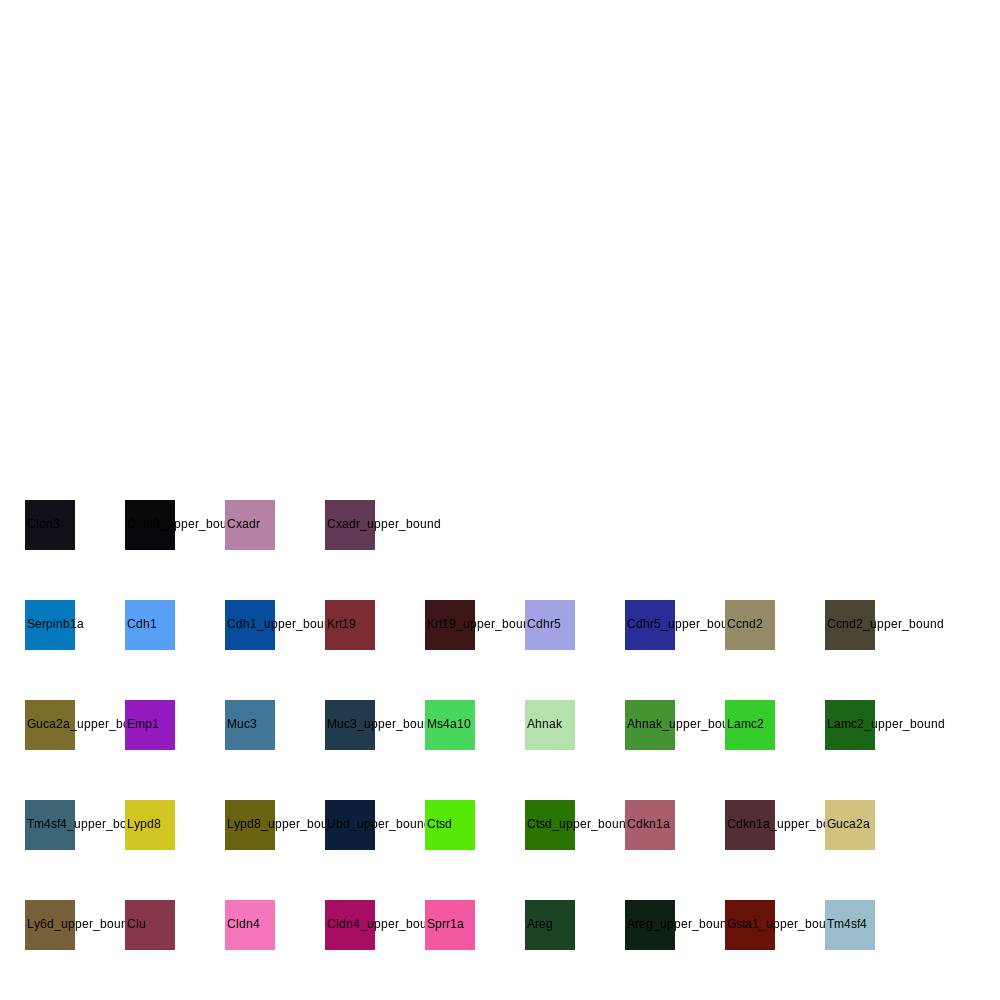

In [26]:
d = draw.Drawing(1000, 1000,  origin=(0,0), displayInline=True)

#draw = ImageDraw.Draw(im)
for w in range(0,split1):
    for t in range(0,split2):
        print(t+(split2*w))
        if t+(split2*w) < len(colors):
            print(genes[t+(split2*w)])
            d.append(draw.Rectangle(25+100*t, 50+100*w, 50, 50, fill='#%02x%02x%02x' % tuple(colors[t+(split2*w)])))
            d.append(draw.Text(genes[t+(split2*w)],12, 27+100*t, 72+100*w, fill='black' ,style="font-family:arial" ))
            #draw.text((27+100*t, 72+100*w), celltypes[t+(split2*w)], fill  = (0, 0, 0), font = ImageFont.truetype("/usr/share/fonts/truetype/freefont/FreeSans.ttf", 10))
d

In [27]:
d.saveSvg('clu_0_2dpi_peaks_by-clusters_heatmap.svg')

In [22]:
cluster_peaksscore = cluster_peaksscore[cluster_peaksscore.columns].astype(float) 

In [94]:
cmap = clr.LinearSegmentedColormap.from_list('custom', ['#add8e6', '#ffff00', '#ff0000', '#000000'], N=256)

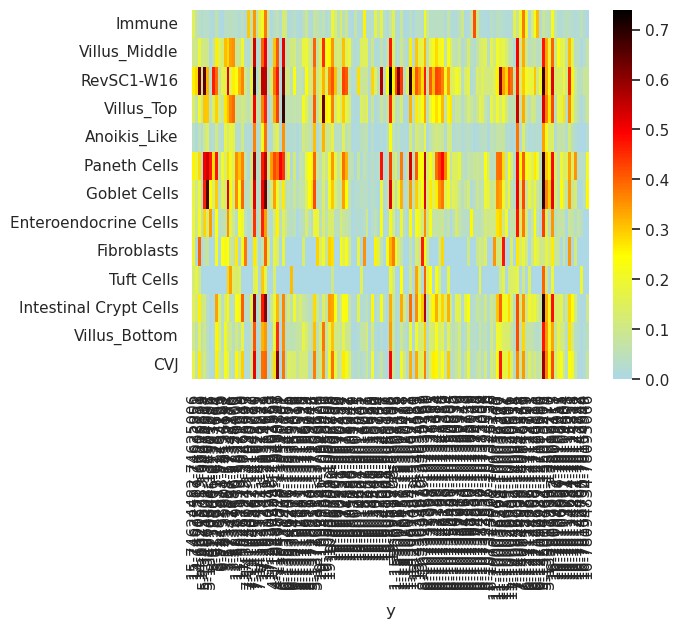

In [21]:
g1 = sns.heatmap(cluster_peaksscore, cmap = cmap, xticklabels = True, yticklabels = True)

In [33]:
colormap

{'15-74624482-74625006': array([0.46666667, 0.38039216, 0.23137255]),
 '15-74632587-74632852': array([0.46666667, 0.38039216, 0.23137255]),
 '14-66205719-66206231': array([0.5254902 , 0.21568627, 0.28627451]),
 '14-66215353-66215699': array([0.5254902 , 0.21568627, 0.28627451]),
 '5-134975601-134976114': array([0.95686275, 0.46666667, 0.73333333]),
 '5-134964408-134964992': array([0.65490196, 0.05098039, 0.38039216]),
 '5-134970644-134971006': array([0.65490196, 0.05098039, 0.38039216]),
 '3-92393066-92393483': array([0.94901961, 0.34901961, 0.62745098]),
 '5-91286931-91287664': array([0.10588235, 0.26666667, 0.14117647]),
 '5-91282837-91283165': array([0.05098039, 0.13333333, 0.07058824]),
 '9-78133813-78134129': array([0.41176471, 0.07058824, 0.02745098]),
 '9-78135801-78136591': array([0.41176471, 0.07058824, 0.02745098]),
 '3-57331858-57332988': array([0.6       , 0.74117647, 0.79607843]),
 '3-57342597-57343176': array([0.6       , 0.74117647, 0.79607843]),
 '3-57327680-57328400': 

In [34]:
genes

['Ly6d_upper_bound',
 'Clu',
 'Cldn4',
 'Cldn4_upper_bound',
 'Sprr1a',
 'Areg',
 'Areg_upper_bound',
 'Gsta1_upper_bound',
 'Tm4sf4',
 'Tm4sf4_upper_bound',
 'Lypd8',
 'Lypd8_upper_bound',
 'Ubd_upper_bound',
 'Ctsd',
 'Ctsd_upper_bound',
 'Cdkn1a',
 'Cdkn1a_upper_bound',
 'Guca2a',
 'Guca2a_upper_bound',
 'Emp1',
 'Muc3',
 'Muc3_upper_bound',
 'Ms4a10',
 'Ahnak',
 'Ahnak_upper_bound',
 'Lamc2',
 'Lamc2_upper_bound',
 'Serpinb1a',
 'Cdh1',
 'Cdh1_upper_bound',
 'Krt19',
 'Krt19_upper_bound',
 'Cdhr5',
 'Cdhr5_upper_bound',
 'Ccnd2',
 'Ccnd2_upper_bound',
 'Cldn3',
 'Cldn3_upper_bound',
 'Cxadr',
 'Cxadr_upper_bound']

In [33]:
all_net_names  = ['early_vis', 'face', 'motion', 'scene', 'scene', 'scene', 
                  'dmn', 'dmn', 'dmn', 'dmn', 'dmn', 'dmn', 'reward', 'reward',
                  'reward', 'reward', 'reward', 'ofc', 'ofc', 'ofc', 'ofc']

In [34]:
net_ind = sorted(np.unique(all_net_names, return_index=True)[1])

In [35]:
[all_net_names[index] for index in sorted(net_ind)]

['early_vis', 'face', 'motion', 'scene', 'dmn', 'reward', 'ofc']

In [36]:
revsc_sigpeaks.x.unique()

array(['Ly6d_upper_bound', 'Clu', 'Cldn4', 'Cldn4_upper_bound', 'Sprr1a',
       'Areg', 'Areg_upper_bound', 'Gsta1_upper_bound', 'Tm4sf4',
       'Tm4sf4_upper_bound', 'Lypd8', 'Lypd8_upper_bound',
       'Ubd_upper_bound', 'Ctsd', 'Ctsd_upper_bound', 'Cdkn1a',
       'Cdkn1a_upper_bound', 'Guca2a', 'Guca2a_upper_bound', 'Emp1',
       'Muc3', 'Muc3_upper_bound', 'Ms4a10', 'Ahnak', 'Ahnak_upper_bound',
       'Lamc2', 'Lamc2_upper_bound', 'Serpinb1a', 'Cdh1',
       'Cdh1_upper_bound', 'Krt19', 'Krt19_upper_bound', 'Cdhr5',
       'Cdhr5_upper_bound', 'Ccnd2', 'Ccnd2_upper_bound', 'Cldn3',
       'Cldn3_upper_bound', 'Cxadr', 'Cxadr_upper_bound'], dtype=object)

In [39]:
geneind = sorted(np.unique(revsc_sigpeaks.x, return_index = True)[1])

In [40]:
genename = [revsc_sigpeaks.x[index] for index in geneind]

In [41]:
np.unique(genes, return_index=True)[1]

array([23, 24,  5,  6, 34, 35, 28, 29, 32, 33, 15, 16, 36, 37,  2,  3,  1,
       13, 14, 38, 39, 19,  7, 17, 18, 30, 31, 25, 26,  0, 10, 11, 22, 20,
       21, 27,  4,  8,  9, 12])

In [40]:
sorted(np.unique(genes, return_index=True)[1])

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

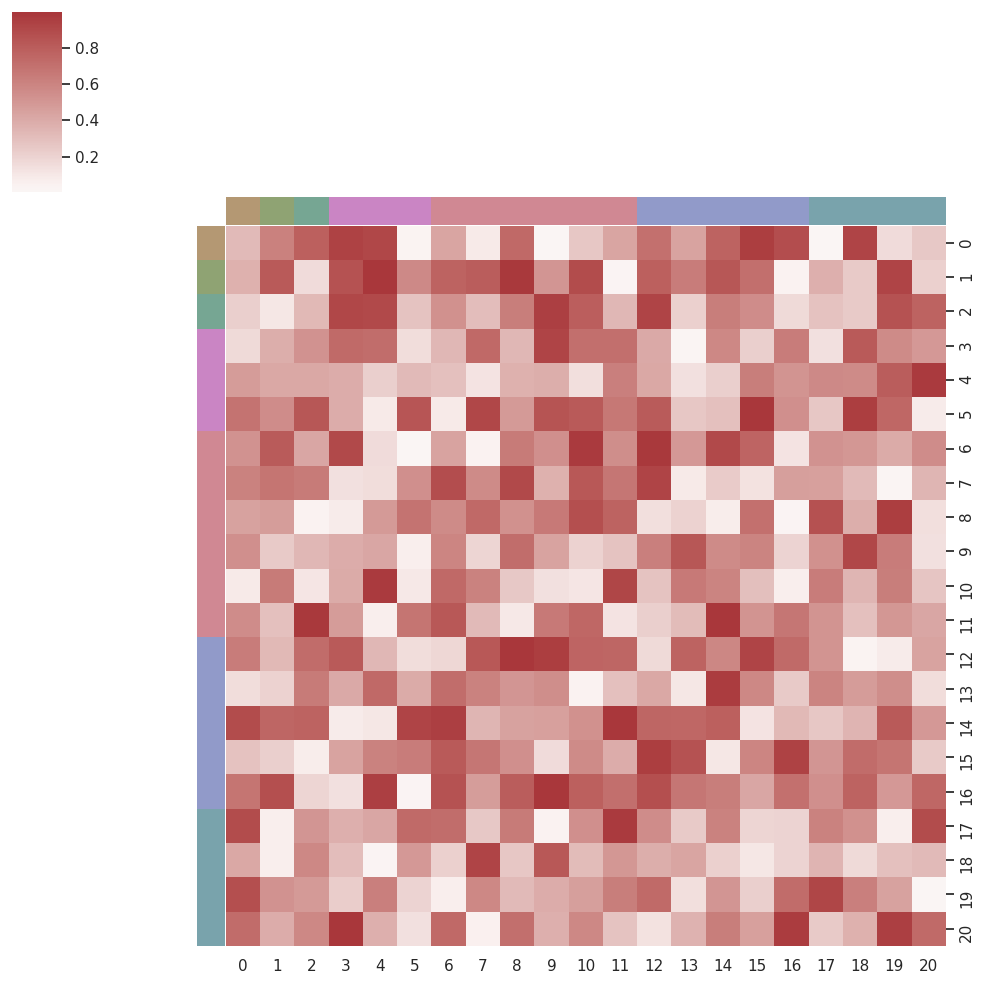

In [41]:
all_net_names  = ['early_vis', 'face', 'motion', 'scene', 'scene', 'scene', 
                  'dmn', 'dmn', 'dmn', 'dmn', 'dmn', 'dmn', 'reward', 'reward',
                  'reward', 'reward', 'reward', 'ofc', 'ofc', 'ofc', 'ofc']

roi_names = ['E', 'F', 'M', 'S1', 'S2', 'S3', 'D1', 'D2', 'D3', 'D4', 'D5',
             'D6', 'R1', 'R2', 'R3', 'R4', 'R5','O1', 'O2', 'O3', 'O4']

n_roi = len(roi_names)
M = np.random.rand(n_roi, n_roi) # array to plot

net_ind = sorted(np.unique(all_net_names, return_index=True)[1])
net_names = [all_net_names[index] for index in sorted(net_ind)]
network_pal = sns.husl_palette(len(net_names), s=.45)
network_lut = dict(zip(map(str, np.unique(all_net_names)), network_pal))
network_colors = pd.Series(all_net_names).map(network_lut)
network_colors = np.asarray(network_colors)

g = sns.clustermap(M, center=0, cmap="vlag",
                   row_cluster=False, 
                   col_cluster=False,
                   row_colors=network_colors, 
                   col_colors=network_colors,
                   linewidths=0, figsize=(10, 10))

In [42]:
np.asarray(cluster_peaksscore)

array([[0.14168401, 0.12645158, 0.11706873, ..., 0.        , 0.04621638,
        0.19076919],
       [0.2149106 , 0.07938988, 0.25142524, ..., 0.00986124, 0.06051389,
        0.3081774 ],
       [0.13318679, 0.11816476, 0.25993551, ..., 0.07962266, 0.        ,
        0.        ],
       ...,
       [0.14647738, 0.04727604, 0.17499768, ..., 0.        , 0.00605058,
        0.05098341],
       [0.15846082, 0.10440431, 0.26285164, ..., 0.00719751, 0.0070456 ,
        0.09471981],
       [0.26179885, 0.28325451, 0.62455013, ..., 0.04589524, 0.0841001 ,
        0.08531288]])

In [35]:
g.ax_row_colors.set_yticks(0.5 * (np.array(net_ind) + np.array(net_ind[1:] + [len(all_net_names)])))
g.ax_row_colors.set_yticklabels(net_names)
g.ax_row_colors.yaxis.set_tick_params(size=0)

NameError: name 'g' is not defined

In [44]:
g

In [20]:
clusters = []
#clusters.append(cluster_counts.columns[cluster_counts.columns.str.startswith('Immune')])
#clusters.append(cluster_counts.columns[cluster_counts.columns.str.startswith('Fibro')])




clusters.append(cluster_peaksscore.index[cluster_peaksscore.index.str.startswith('Goblet')])
clusters.append(cluster_peaksscore.index[cluster_peaksscore.index.str.startswith('Enteroendocrine')])
clusters.append(cluster_peaksscore.index[cluster_peaksscore.index.str.startswith('Tuft')])

#clusters.append(cluster_peaksscore.index[cluster_peaksscore.index.str.startswith('Anoikis')])
#clusters.append(cluster_peaksscore.index[cluster_peaksscore.index.str.startswith('Villus-T')])
#clusters.append(cluster_peaksscore.index[cluster_peaksscore.index.str.startswith('Villus-M')])
#clusters.append(cluster_peaksscore.index[cluster_peaksscore.index.str.startswith('Villus-B')])
#clusters.append(cluster_peaksscore.index[cluster_peaksscore.index.str.startswith('CVJ')])
clusters.append(cluster_peaksscore.index[cluster_peaksscore.index.str.startswith('Enterocyte')])
clusters.append(cluster_peaksscore.index[cluster_peaksscore.index.str.startswith('Paneth')])
clusters.append(cluster_peaksscore.index[cluster_peaksscore.index.str.startswith('Crypt')])
clusters.append(cluster_peaksscore.index[cluster_peaksscore.index.str.startswith('RevSC')])

In [21]:
clusters

[Index([], dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object')]

In [22]:
cluster_peaksscore

top_a13_markers,12-76505607-76506247,2-102636030-102636967,1-169406976-169407462,7-144524706-144525822,1-187642670-187643284,17-24462669-24463661,9-14587115-14588048,X-11394750-11395179,17-48164612-48164997,18-25417918-25418416,...,10-42815981-42817062,12-103291463-103292086,3-37693637-37695233,18-84745408-84746055,3-129341405-129341846,8-39472712-39473621,8-107311563-107312194,17-71395830-71396570,11-103253899-103254635,4-125051824-125052198
Immune,0.018263,0.018311,0.008976,0.029882,0.015846,0.023843,0.024961,0.009928,0.009999,0.009522,...,0.058849,0.409480,0.278230,0.067227,0.023733,0.308809,0.060069,0.106219,0.148178,0.029400
Enterocytes,0.023230,0.028190,0.010361,0.068216,0.039682,0.040631,0.047966,0.013453,0.049553,0.017406,...,0.299189,0.107366,0.372312,0.212350,0.172343,0.160580,0.290036,0.204470,0.119922,0.224588
RevSC1,0.974887,0.936946,0.650603,0.903087,0.728498,0.726851,0.768154,0.540272,0.635096,0.554314,...,0.461307,0.340351,0.650611,0.362356,0.380266,0.458130,0.572236,0.447964,0.362145,0.398644
Paneth Cells,0.340711,0.584445,0.000000,0.264447,0.057497,0.044348,0.359516,0.000000,0.096788,0.042677,...,0.396818,0.211182,0.553567,0.221491,0.316126,0.433794,0.621373,0.617252,0.321435,0.031064
Goblet Cells,0.059949,0.065064,0.012452,0.100528,0.050821,0.022706,0.131941,0.000000,0.030901,0.023288,...,0.360210,0.117218,0.522239,0.279263,0.152111,0.343011,0.414363,0.460506,0.208913,0.061673
Enteroendocrine Cells,0.109058,0.000000,0.000000,0.057526,0.029522,0.066664,0.095153,0.000000,0.022958,0.000000,...,0.248658,0.359671,0.387710,0.109517,0.060557,0.588529,0.240963,0.192397,0.281495,0.036102
Fibroblasts,0.000000,0.000000,0.000000,0.358693,0.094420,0.000000,0.000000,0.000000,0.096904,0.000000,...,0.097804,0.202397,0.306971,0.134486,0.220635,0.074819,0.041254,0.118903,0.156260,0.061935
Crypt Cells,0.062315,0.220787,0.022800,0.287764,0.021693,0.053903,0.214700,0.030096,0.030147,0.020035,...,0.424318,0.135371,0.505237,0.140997,0.257575,0.267198,0.352783,0.107061,0.224101,0.133578


In [17]:
np.hstack(clusters)

array(['CVJ', 'Anoikis_Like', 'Villus_Middle', 'Villus_Top',
       'Villus_Bottom', 'Goblet Cells', 'Enteroendocrine Cells',
       'Tuft Cells', 'Paneth Cells', 'Intestinal Crypt Cells',
       'RevSC1-W16'], dtype=object)

In [20]:
clusts = [x for x in cluster_peaksscore.index if x not in ['A16', 'A7', 'A1']]

In [21]:
cluster_peaksscore2 = cluster_peaksscore.loc[:,cluster_peaksscore.columns[0:100]]

In [22]:
cluster_peaksscore2 = cluster_peaksscore2.loc[clusts,:]

In [23]:
cluster_peaksscore2 = cluster_peaksscore2[cluster_peaksscore2.columns].astype(float) 

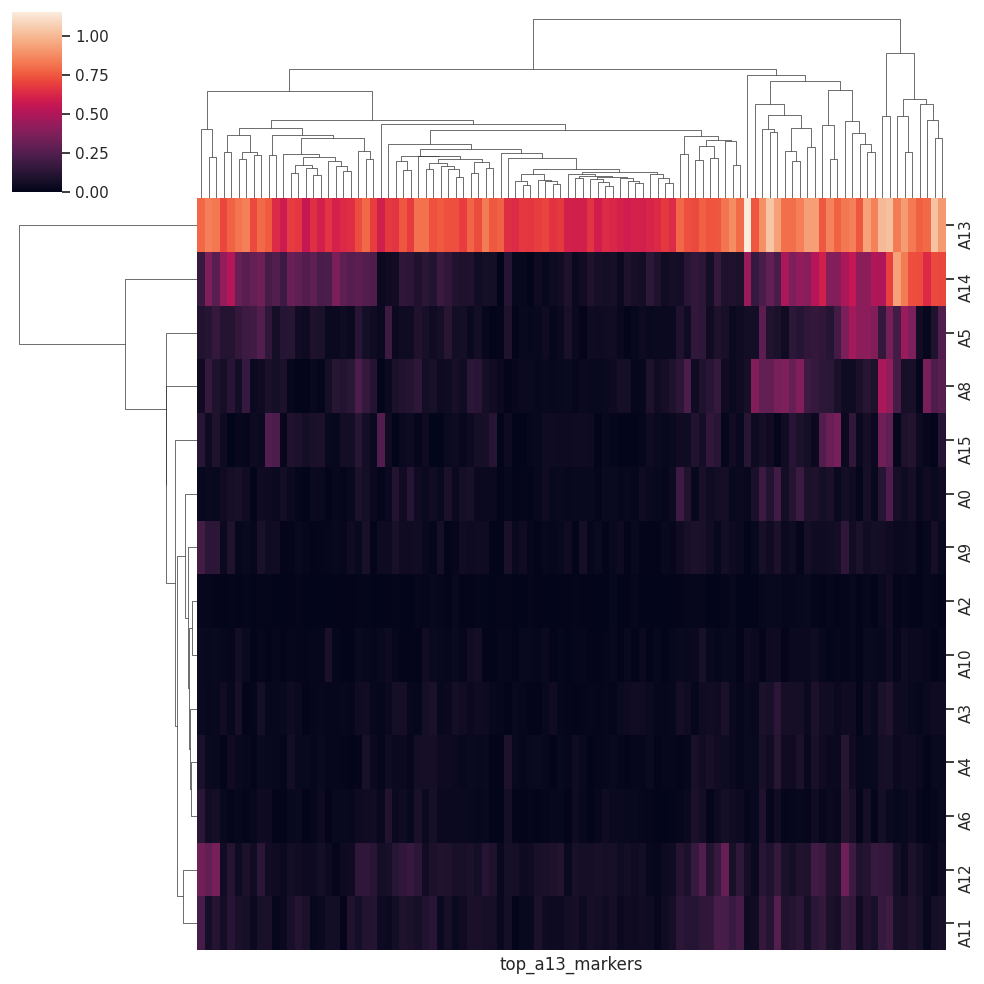

In [24]:
#g4 = sns.clustermap(cluster_peaksscore, col_cluster = False,row_cluster = False,yticklabels = True, xticklabels = False, col_colors = cluster_peaksscore.columns.map(colormap).to_numpy(),figsize=(10, 10), cmap=cmap)
g4 = sns.clustermap(cluster_peaksscore2, col_cluster = True,row_cluster = True,yticklabels = True, xticklabels = False, figsize=(10, 10))


In [28]:
cluster_peaksscore3 = cluster_peaksscore2.div(cluster_peaksscore2.sum(axis = 1), axis = 0)

In [33]:
cluster_peaksscore3.iloc[:,cluster_peaksscore3.loc['A13',:].argsort()]

top_a13_markers,3-101140651-101140995,17-56858123-56858398,2-24226551-24226890,5-120655650-120655993,11-118373969-118374477,7-134375407-134375923,4-119643434-119643816,19-59832649-59833076,2-179857693-179858104,5-36360859-36361678,...,3-121418976-121420293,15-61951026-61951813,9-14587115-14588048,13-24749139-24750352,12-112761164-112761845,11-83773355-83774179,19-47496822-47497757,2-102636030-102636967,7-144524706-144525822,12-76505607-76506247
A2,0.004126,0.004577,0.004643,0.003947,0.005164,0.000000,0.012987,0.000000,0.003637,0.008519,...,0.014595,0.011863,0.023387,0.024468,0.015331,0.031322,0.052688,0.014555,0.024609,0.003857
A4,0.007606,0.003771,0.001902,0.003254,0.007174,0.004939,0.012890,0.010426,0.004619,0.005010,...,0.012714,0.022918,0.007681,0.035890,0.007381,0.019858,0.021338,0.009166,0.015621,0.008812
A3,0.001581,0.006811,0.011360,0.003115,0.002792,0.004816,0.001516,0.005631,0.012032,0.003026,...,0.011413,0.023719,0.008748,0.037168,0.014530,0.021995,0.028898,0.013249,0.021121,0.007755
A9,0.003968,0.001956,0.000000,0.007567,0.015285,0.009933,0.001827,0.002306,0.000000,0.011354,...,0.007609,0.010812,0.014882,0.020636,0.013187,0.014281,0.012079,0.016059,0.012395,0.000000
A13,0.007493,0.007762,0.007838,0.007925,0.007979,0.007988,0.007996,0.008012,0.008020,0.008040,...,0.012336,0.012359,0.012367,0.012450,0.012574,0.013384,0.013645,0.013730,0.013807,0.015413
A12,0.004230,0.003630,0.006102,0.007663,0.007093,0.006274,0.007769,0.006321,0.005738,0.003268,...,0.002847,0.021215,0.009755,0.016743,0.011523,0.016333,0.015879,0.001859,0.010040,0.006742
A6,0.002279,0.002209,0.008608,0.006752,0.007035,0.007979,0.014385,0.011705,0.004968,0.001621,...,0.007956,0.014421,0.003704,0.017065,0.020854,0.020357,0.009777,0.005387,0.005303,0.005142
A11,0.009971,0.004316,0.005517,0.006982,0.004592,0.004715,0.008485,0.004030,0.006522,0.006868,...,0.008488,0.015502,0.008755,0.031218,0.011647,0.019796,0.023340,0.007510,0.013254,0.004908
A14,0.010311,0.007525,0.003548,0.002932,0.002208,0.001327,0.001387,0.009095,0.002232,0.003662,...,0.034323,0.021063,0.016249,0.009200,0.016653,0.020305,0.028428,0.029250,0.011991,0.018237
A10,0.004365,0.000000,0.012322,0.004104,0.007426,0.011964,0.008173,0.008227,0.016297,0.000000,...,0.020300,0.019465,0.013687,0.020543,0.013771,0.008929,0.023294,0.003097,0.018827,0.021072


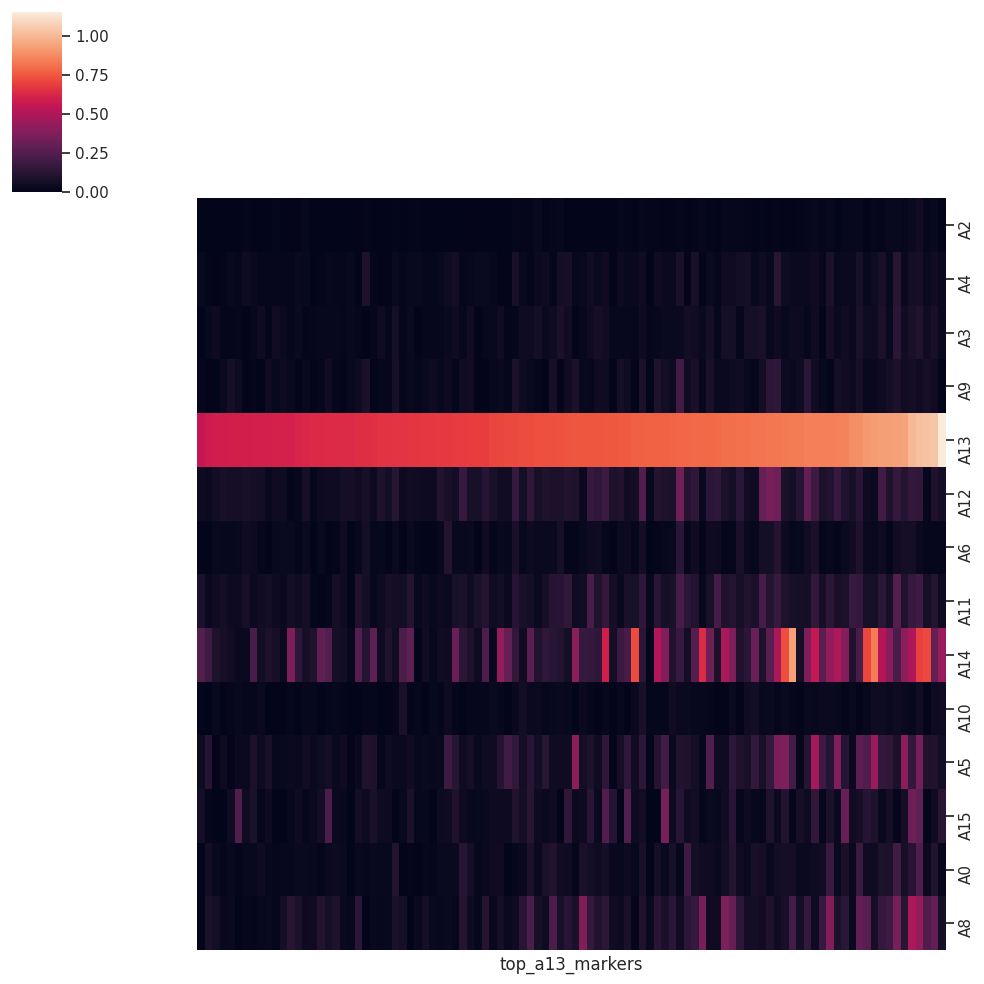

In [34]:
g4 = sns.clustermap(cluster_peaksscore2.iloc[:, cluster_peaksscore3.loc['A13',:].argsort()], col_cluster = False,row_cluster = False,yticklabels = True, xticklabels = False, figsize=(10, 10))


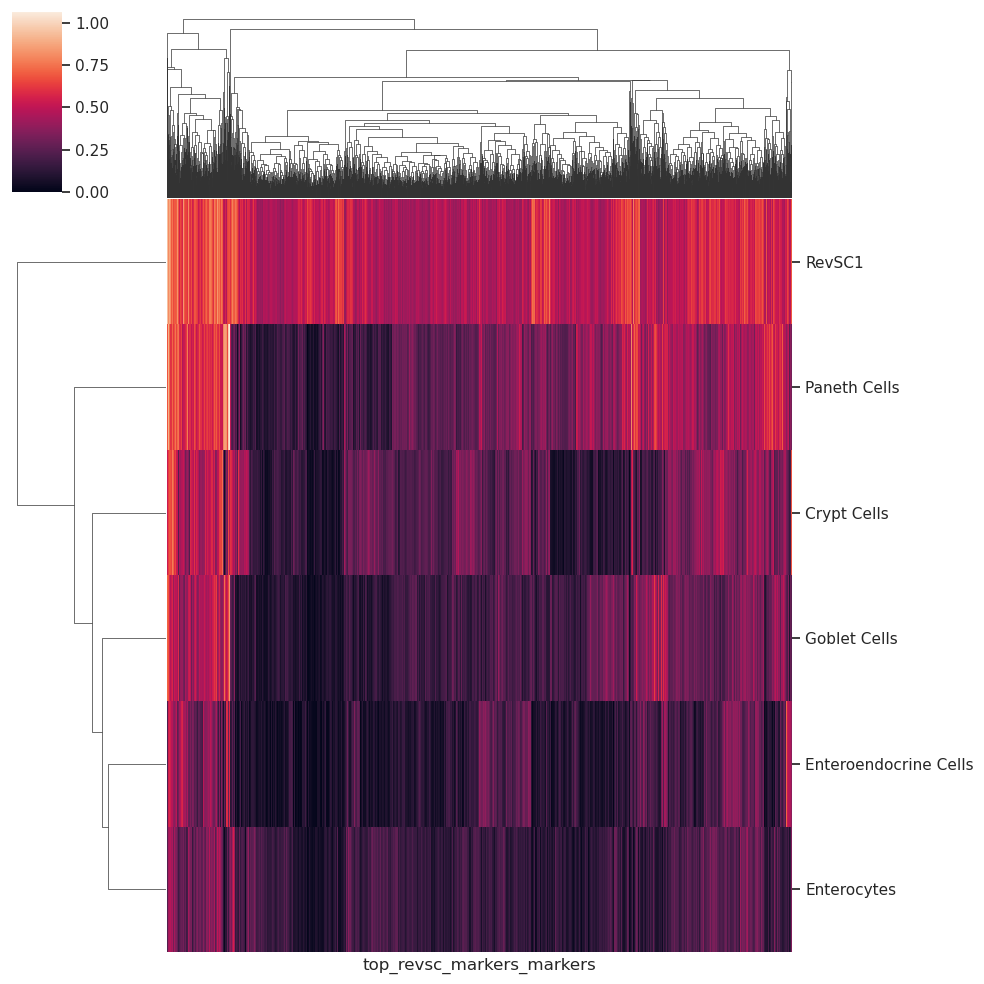

In [26]:
g4 = sns.clustermap(cluster_peaksscore, col_cluster = True,row_cluster = True,yticklabels = True, xticklabels = False, figsize=(10, 10))


In [22]:
revsc_sig_peaks = pd.read_csv('revsc_peaks_sig_selective_revsc_clu_0_2dpi.csv', index_col = 0)

In [23]:
revsc_sig_peaks

,"rownames(revsc_peaks_fc[revsc_peaks_fc$p_val < 0.05, ])"
1,1-153005678-153006372
2,19-9043021-9043927
3,5-134975601-134976114
4,15-76088240-76088671
5,14-66205719-66206231
6,15-101899147-101899754
7,9-69364881-69365807
8,1-153061434-153062111
9,11-100036599-100037277
10,2-35157002-35158171


In [25]:
revsc_sig_peaks.iloc[:,0]

1      1-153005678-153006372
2         19-9043021-9043927
3      5-134975601-134976114
4       15-76088240-76088671
5       14-66205719-66206231
6     15-101899147-101899754
7        9-69364881-69365807
8      1-153061434-153062111
9     11-100036599-100037277
10       2-35157002-35158171
11        19-8959999-8960998
12    11-100029655-100030006
13       2-35172104-35172675
14       9-69374548-69375244
15     1-153016457-153017078
16     8-107335008-107335391
17       3-57331858-57332988
18    11-115865339-115866077
19       2-35156519-35156850
20     8-107342386-107342914
21        19-8974838-8975242
22      15-76091528-76091981
23     3-121516550-121517528
24      11-70350099-70351027
25     6-135338966-135340102
26      16-78114684-78115251
Name: rownames(revsc_peaks_fc[revsc_peaks_fc$p_val < 0.05, ]), dtype: object

In [26]:
cluster_peaksscore.loc[:,revsc_sig_peaks.iloc[:,0]]

y,1-153005678-153006372,19-9043021-9043927,5-134975601-134976114,15-76088240-76088671,14-66205719-66206231,15-101899147-101899754,9-69364881-69365807,1-153061434-153062111,11-100036599-100037277,2-35157002-35158171,...,3-57331858-57332988,11-115865339-115866077,2-35156519-35156850,8-107342386-107342914,19-8974838-8975242,15-76091528-76091981,3-121516550-121517528,11-70350099-70351027,6-135338966-135340102,16-78114684-78115251
CVJ,0.025617,0.077455,0.112275,0.112243,0.266946,0.328860,0.491514,0.325430,0.471811,0.316070,...,0.173595,0.375347,0.141421,0.148873,0.211252,0.190563,0.360202,0.303147,0.379279,0.250450
Anoikis_Like,0.047133,0.017624,0.092682,0.062548,0.059054,0.032067,0.278836,0.128885,0.071196,0.114223,...,0.117001,0.156934,0.052953,0.096956,0.049940,0.067980,0.130227,0.064663,0.352469,0.129412
Villus_Middle,0.034505,0.066382,0.104710,0.107203,0.185811,0.088217,0.443363,0.264755,0.168437,0.369433,...,0.282334,0.322623,0.148065,0.213585,0.151313,0.139746,0.357886,0.295133,0.516889,0.313998
Villus_Top,0.056550,0.082839,0.302566,0.123950,0.204089,0.106583,0.559392,0.321965,0.126499,0.441075,...,0.311833,0.317517,0.201860,0.244423,0.165617,0.169538,0.278247,0.295984,0.681575,0.362640
Villus_Bottom,0.028136,0.027691,0.095242,0.059689,0.159311,0.108081,0.323842,0.199820,0.186347,0.239373,...,0.110258,0.258792,0.091114,0.126931,0.096578,0.109736,0.343616,0.209498,0.358181,0.275829
Goblet Cells,0.176670,0.189009,0.464636,0.310350,0.189772,0.329444,0.498397,0.344589,0.337768,0.597652,...,0.519480,0.448030,0.246377,0.347352,0.247147,0.398656,0.283349,0.329857,0.268084,0.345684
Enteroendocrine Cells,0.037850,0.226501,0.290209,0.184059,0.219287,0.092208,0.199304,0.252927,0.291678,0.287287,...,0.352890,0.223415,0.077513,0.078480,0.066644,0.310666,0.143793,0.183219,0.152964,0.085197
Tuft Cells,0.000000,0.000000,0.000000,0.135598,0.109309,0.239556,0.102635,0.107078,0.112501,0.114587,...,0.283619,0.516116,0.000000,0.131047,0.000000,0.115540,0.098530,0.098654,0.000000,0.000000
Paneth Cells,0.034217,0.477472,0.503256,0.561230,0.281230,0.424857,0.625493,0.527887,0.387691,0.621959,...,0.281371,0.602315,0.268517,0.434193,0.318977,0.565913,0.351445,0.371626,0.445044,0.339451
Intestinal Crypt Cells,0.027476,0.220190,0.105308,0.225412,0.262852,0.412481,0.521172,0.387704,0.398632,0.387949,...,0.254528,0.397961,0.259147,0.173991,0.231176,0.346278,0.333286,0.327648,0.364363,0.289264


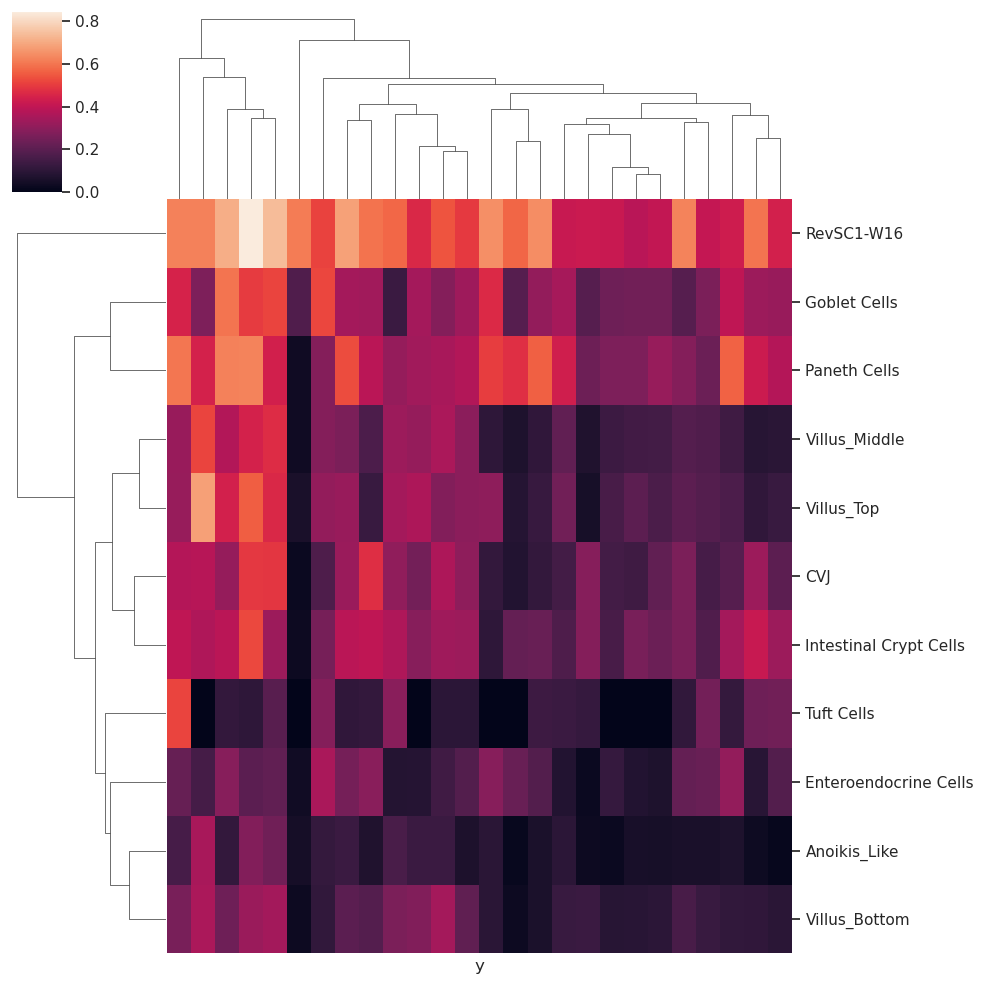

In [27]:
g4 = sns.clustermap(cluster_peaksscore.loc[:,revsc_sig_peaks.iloc[:,0]], col_cluster = True,row_cluster = True,yticklabels = True, xticklabels = False, figsize=(10, 10))


In [28]:
revsc_dpe = pd.read_csv('clu_0_2_dpi_revsc_signature_peaks_all_dpe.csv', index_col = 0)

In [33]:
np.argsort(-1*np.log10(revsc_dpe.loc[:,'p_val']))

1-153005678-153006372    256
1-153002197-153002476    255
3-92393066-92393483      254
19-9043021-9043927       253
5-134975601-134976114    252
                        ... 
8-107365320-107365739      4
6-135346296-135346755      3
11-70338302-70338515       2
11-70342507-70343346       1
8-107350486-107350805      0
Name: p_val, Length: 257, dtype: int64

In [43]:
revsc_dpe

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
1-153005678-153006372,2.125571e-26,3.857906,0.125,0.008,2.435947e-21
1-153002197-153002476,6.191489e-18,4.370896,0.075,0.003,7.095570e-13
3-92393066-92393483,8.029689e-18,3.498152,0.091,0.007,9.202184e-13
19-9043021-9043927,9.003294e-14,2.373616,0.139,0.024,1.031796e-08
5-134975601-134976114,4.767593e-13,2.254083,0.178,0.032,5.463757e-08
...,...,...,...,...,...
8-107365320-107365739,9.623889e-01,0.812578,0.041,0.020,1.000000e+00
6-135346296-135346755,9.685618e-01,0.788508,0.022,0.012,1.000000e+00
11-70338302-70338515,9.793733e-01,0.410046,0.007,0.004,1.000000e+00
11-70342507-70343346,9.832208e-01,0.378992,0.320,0.195,1.000000e+00


In [48]:
ix = revsc_dpe.iloc[np.argsort(revsc_dpe.loc[:,'avg_log2FC']),:].index

In [35]:
revsc_dpe.index

Index(['1-153005678-153006372', '1-153002197-153002476', '3-92393066-92393483',
       '19-9043021-9043927', '5-134975601-134976114', '15-76088240-76088671',
       '14-66205719-66206231', '15-25395178-25395538', '2-35161829-35162094',
       '1-152997087-152997430',
       ...
       '8-107329523-107330169', '5-137202190-137202448', '19-9014401-9014701',
       '14-66215353-66215699', '15-76092277-76092605', '8-107365320-107365739',
       '6-135346296-135346755', '11-70338302-70338515', '11-70342507-70343346',
       '8-107350486-107350805'],
      dtype='object', length=257)

In [36]:
cluster_peaksscore.loc[:,revsc_dpe.index]

,1-153005678-153006372,1-153002197-153002476,3-92393066-92393483,19-9043021-9043927,5-134975601-134976114,15-76088240-76088671,14-66205719-66206231,15-25395178-25395538,2-35161829-35162094,1-152997087-152997430,...,8-107329523-107330169,5-137202190-137202448,19-9014401-9014701,14-66215353-66215699,15-76092277-76092605,8-107365320-107365739,6-135346296-135346755,11-70338302-70338515,11-70342507-70343346,8-107350486-107350805
CVJ,0.025617,0.026677,0.007171,0.077455,0.112275,0.112243,0.266946,0.006145,0.050848,0.011228,...,0.370969,0.035460,0.021913,0.061732,0.234752,0.175948,0.154811,0.006552,0.602857,0.045220
Anoikis_Like,0.047133,0.016689,0.024482,0.017624,0.092682,0.062548,0.059054,0.009507,0.008170,0.026739,...,0.175503,0.033735,0.048331,0.017318,0.096344,0.040974,0.022421,0.009589,0.396195,0.115445
Villus_Middle,0.034505,0.014800,0.061156,0.066382,0.104710,0.107203,0.185811,0.052353,0.087926,0.016121,...,0.316782,0.056585,0.143124,0.099437,0.176103,0.128332,0.074177,0.011794,0.594544,0.138953
Villus_Top,0.056550,0.038740,0.139975,0.082839,0.302566,0.123950,0.204089,0.067520,0.104171,0.034487,...,0.329489,0.061800,0.141655,0.094818,0.176738,0.125820,0.061697,0.030636,0.558749,0.269416
Villus_Bottom,0.028136,0.000000,0.014975,0.027691,0.095242,0.059689,0.159311,0.011513,0.012004,0.005431,...,0.296516,0.046330,0.066616,0.050044,0.167374,0.124380,0.055190,0.003359,0.488628,0.070520
Goblet Cells,0.176670,0.038573,0.137248,0.189009,0.464636,0.310350,0.189772,0.058211,0.183658,0.054466,...,0.517773,0.270170,0.047345,0.025754,0.238735,0.115267,0.054702,0.010820,0.625163,0.106608
Enteroendocrine Cells,0.037850,0.000000,0.014495,0.226501,0.290209,0.184059,0.219287,0.000000,0.048938,0.019892,...,0.361122,0.022975,0.018776,0.037116,0.217929,0.040120,0.051441,0.000000,0.547249,0.000000
Tuft Cells,0.000000,0.000000,0.000000,0.000000,0.000000,0.135598,0.109309,0.000000,0.000000,0.000000,...,0.402302,0.000000,0.154025,0.000000,0.000000,0.000000,0.000000,0.000000,0.244883,0.000000
Paneth Cells,0.034217,0.137636,0.273187,0.477472,0.503256,0.561230,0.281230,0.131771,0.159772,0.055931,...,0.555618,0.228093,0.011797,0.021010,0.347341,0.071319,0.177007,0.000000,0.767624,0.066340
Intestinal Crypt Cells,0.027476,0.000000,0.013283,0.220190,0.105308,0.225412,0.262852,0.000000,0.017228,0.016402,...,0.565602,0.042360,0.024876,0.094603,0.273668,0.240817,0.128242,0.006527,0.646523,0.113341


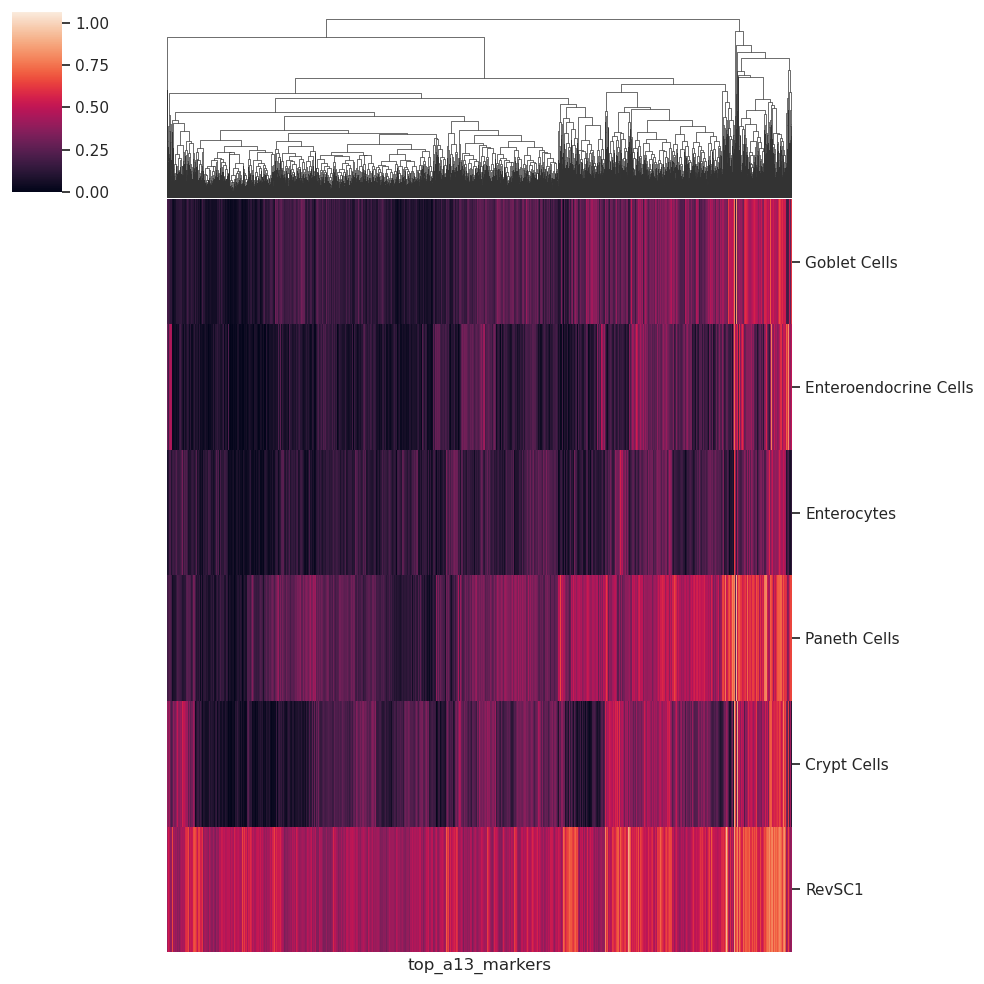

In [26]:
g4 = sns.clustermap(cluster_peaksscore, col_cluster = True,row_cluster = False,yticklabels = True, xticklabels = False, figsize=(10, 10))


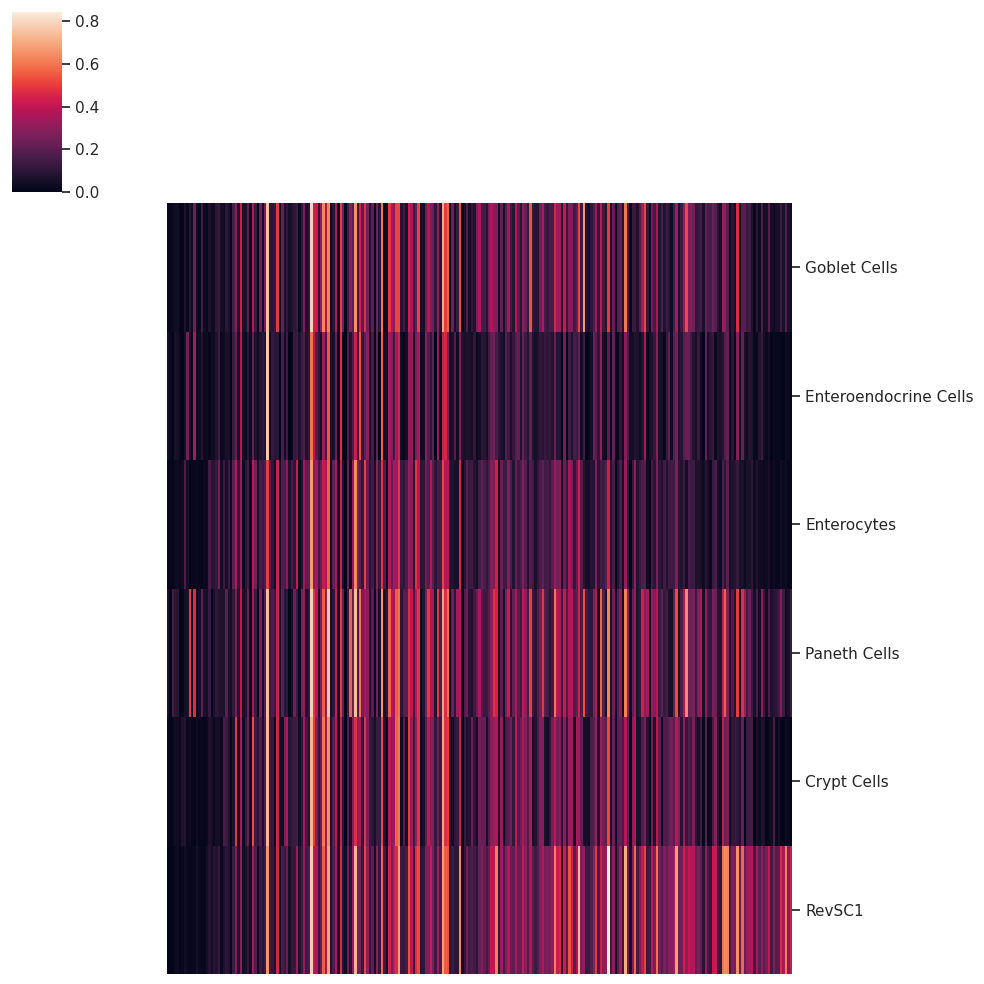

In [187]:
g4 = sns.clustermap(cluster_peaksscore.loc[:,ix], col_cluster = False,row_cluster = False,yticklabels = True, xticklabels = False, figsize=(10, 10))


In [192]:
revsc_peaks_retained = []
for i in np.arange(0,0.8, 0.025):
    revsc_peaks_retained.append(len(np.where(cluster_peaksscore.loc['RevSC1',:]> i)[0]))

In [193]:
import plotly.graph_objects as go



In [194]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = np.arange(0, 0.8, 0.025), y = np.array(revsc_peaks_retained)))

In [195]:
ix2 = cluster_peaksscore.columns[np.where(cluster_peaksscore.loc['RevSC1',:]> 0.15)[0]]

In [189]:
ix3 = cluster_peaksscore.columns[np.argsort(cluster_peaksscore.loc['RevSC1',:])]

In [198]:
cluster_peaksscore2 = cluster_peaksscore.loc[:,ix]

In [201]:
ix2 = cluster_peaksscore2.columns[np.where(cluster_peaksscore2.loc['RevSC1',:]> 0.1)[0]]

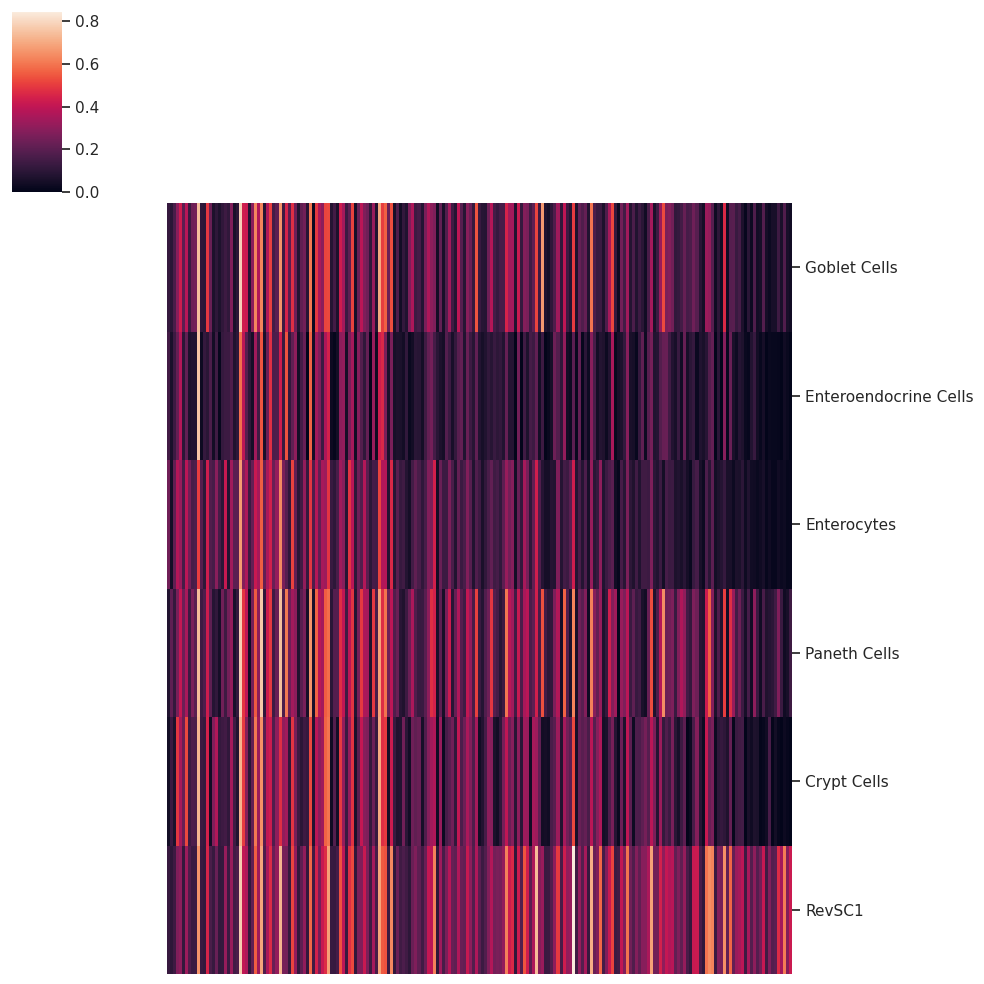

In [205]:
g4 = sns.clustermap(cluster_peaksscore2.loc[:,ix2], col_cluster = False,row_cluster = False,yticklabels = True, xticklabels = False, figsize=(10, 10))


In [50]:
g4.ax_col_colors.set_xticks(0.5 * (np.array(geneind) + np.array(geneind[1:] + [len(revsc_sigpeaks.x)])))
g4.ax_col_colors.set_xticklabels(genename, rotation = 90, size=7)
g4.ax_col_colors.xaxis.set_tick_params(size=0)
g4.ax_col_colors.xaxis.tick_top()

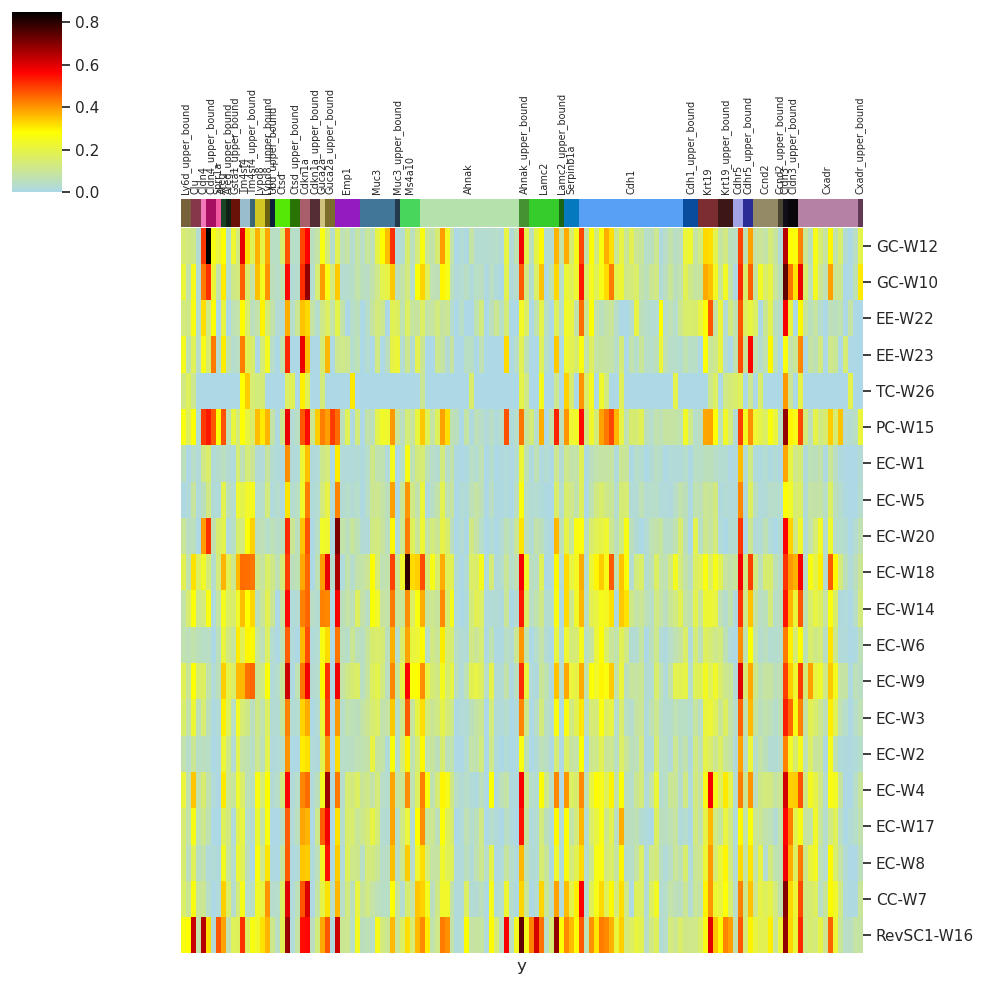

In [51]:
g4.fig

In [52]:
g4.ax_row_colors

In [53]:
g.ax_row_colors

NameError: name 'g' is not defined

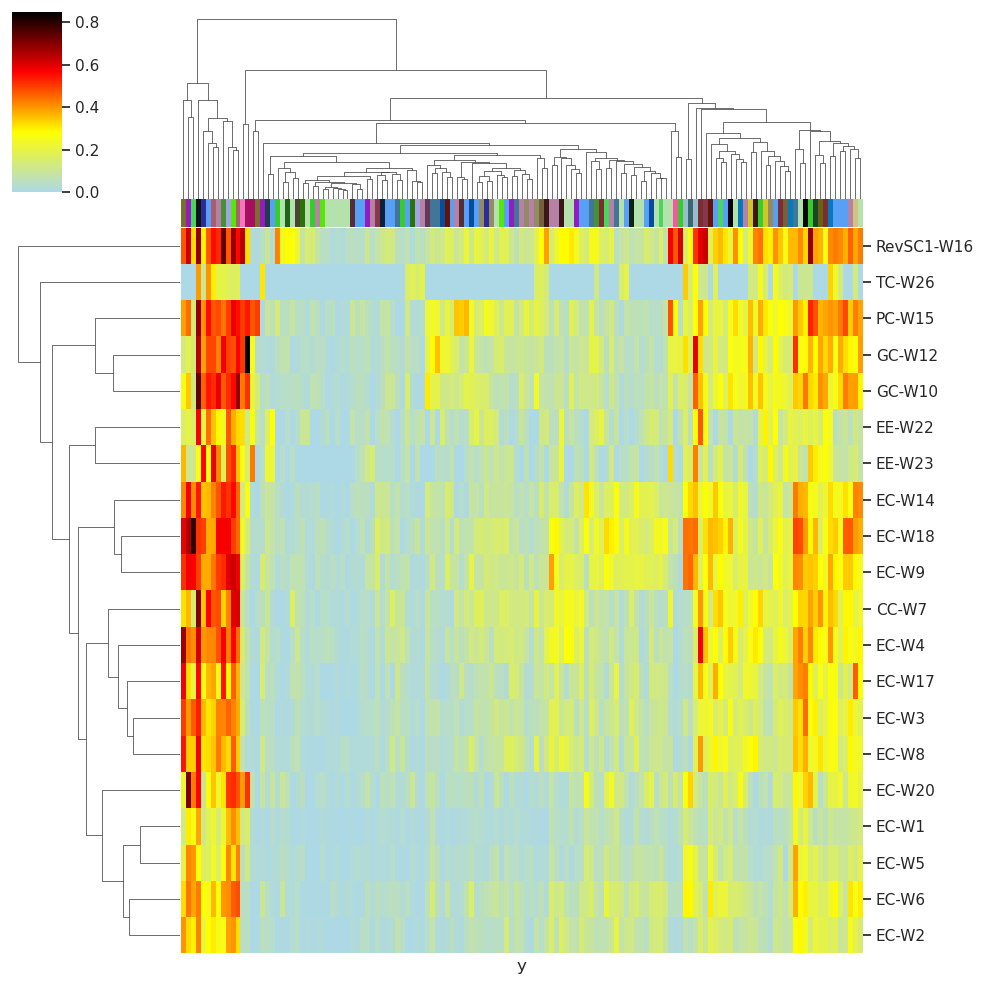

In [54]:
g5 = sns.clustermap(cluster_peaksscore, col_cluster = True,row_cluster = True,yticklabels = True, xticklabels = False, col_colors = cluster_peaksscore.columns.map(colormap).to_numpy(),figsize=(10, 10), cmap=cmap)


In [50]:
g4.figure.savefig('cluall_0_2_dpi_peaks_expression_by_cluster_new.pdf')

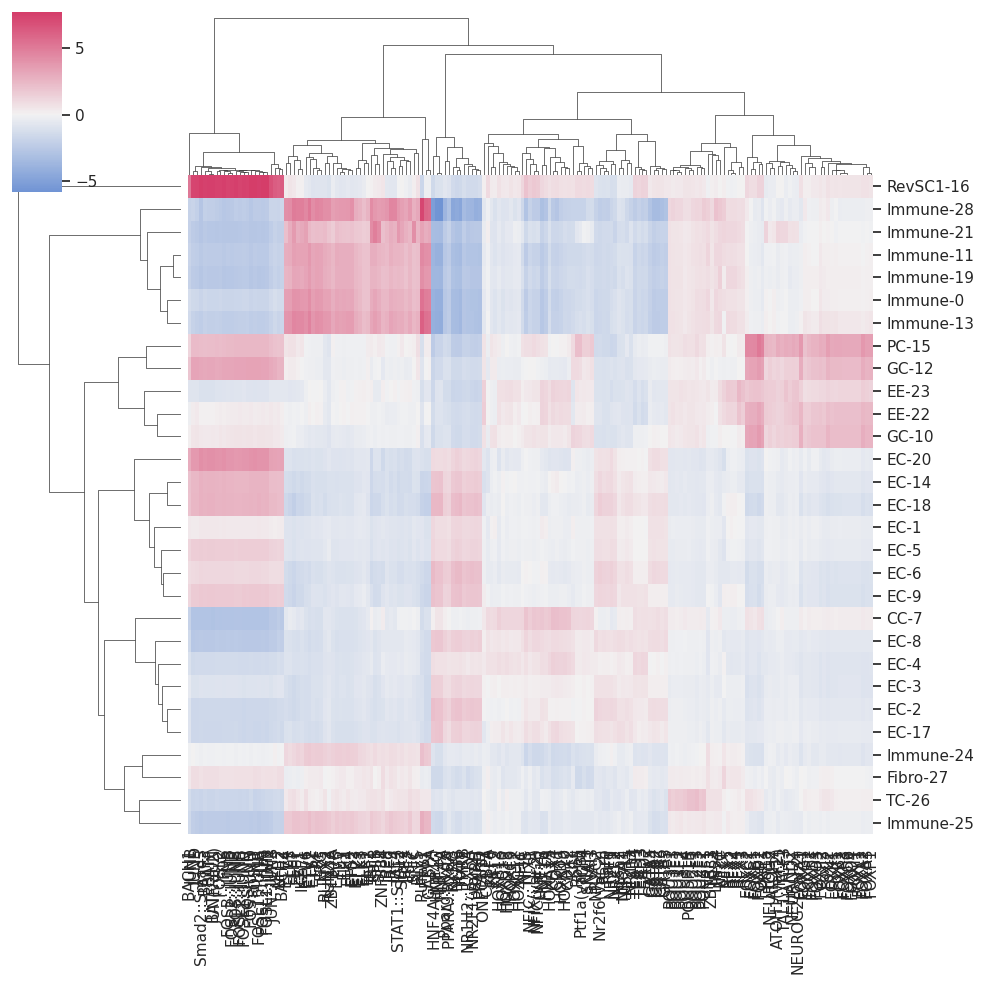

In [25]:
g1 = sns.clustermap(cluster_tfscore, cmap = cmap, center = 0, xticklabels = True, yticklabels = True)

In [26]:
g1.figure.set_size_inches(40, 10)

In [27]:
g1.tick_params(axis='x', which='major', labelsize=12)
g1.tick_params(axis='y', which='major', labelsize=12)

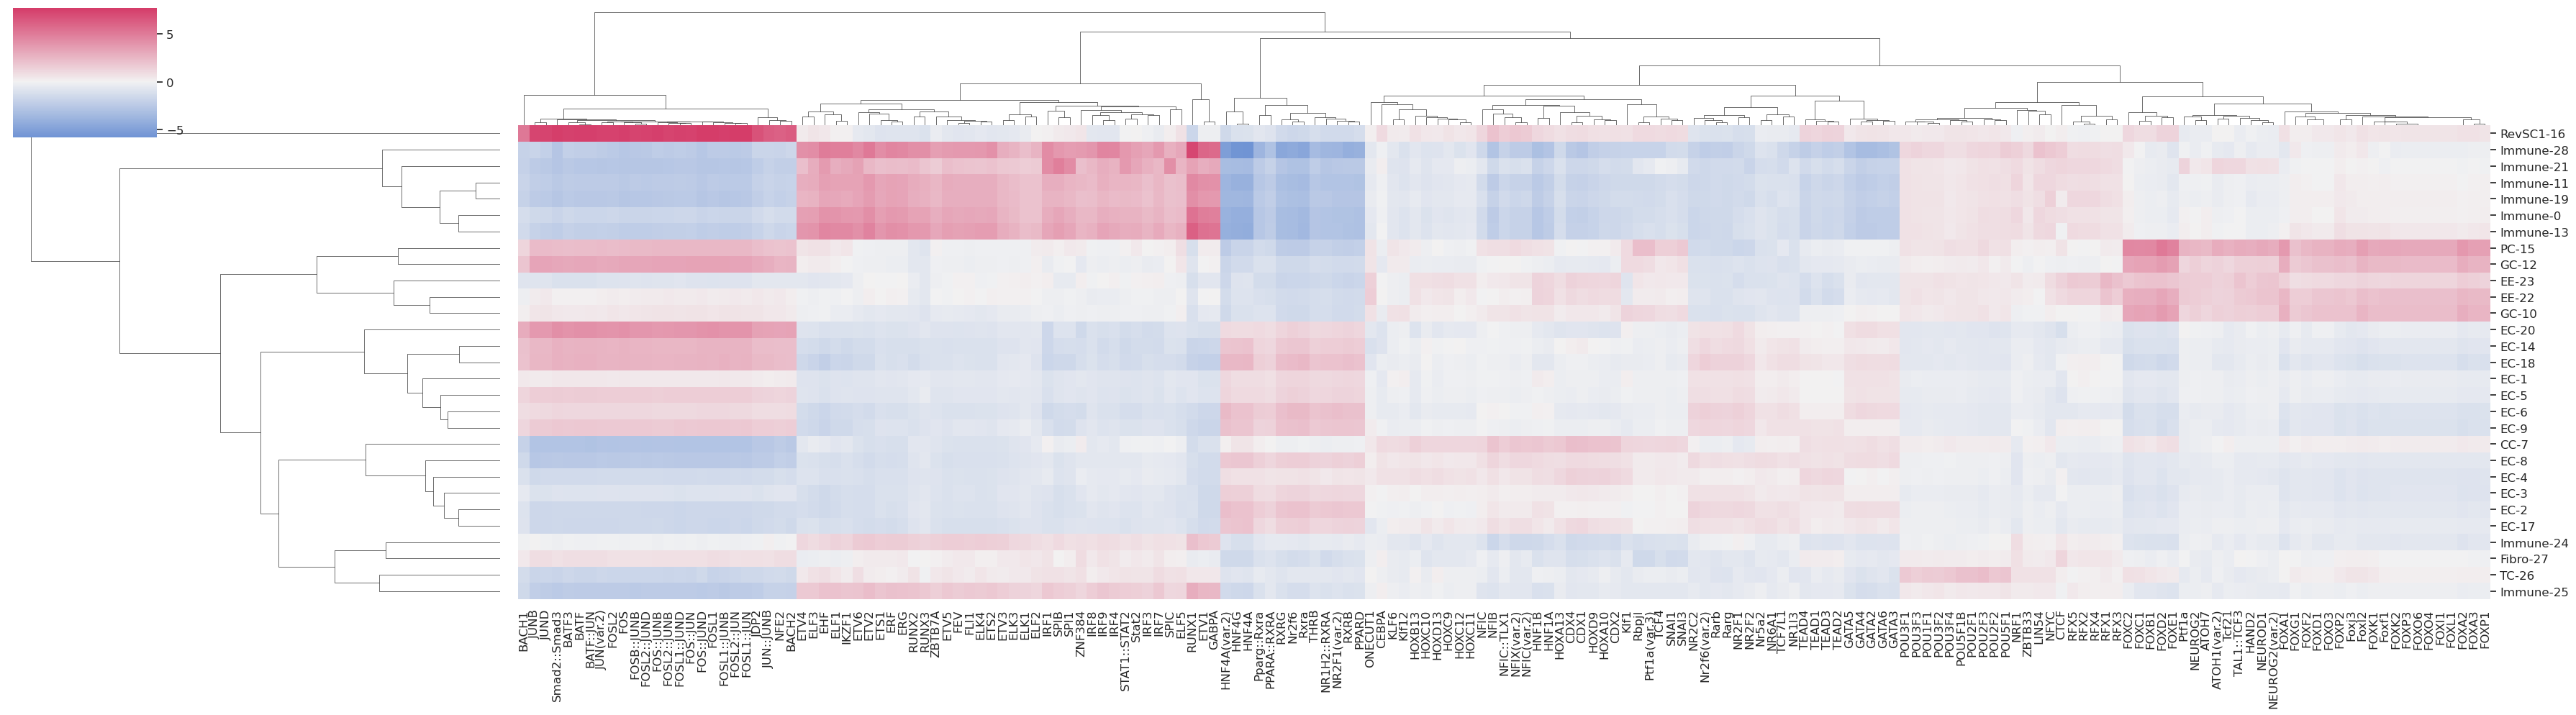

In [28]:
g1.figure

In [29]:
g1.figure.savefig('clu_0_2_dpi_chromvar_cluster_wnn.pdf')

In [28]:
g1.figure.savefig('clu_0_2_dpi_chromvar_cluster_rna.pdf')

In [26]:
g1.figure.savefig('clu_0_2_dpi_chromvar_cluster_test.pdf')